In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
import collections

### Load Train, Dev, Test Data

In [ ]:
header = ['text', 'emotion_id', 'id']
dev = pd.read_csv('./go-emotion-data/dev.tsv', delimiter='\t', header=0, names = header)
train = pd.read_csv('./go-emotion-data/train.tsv', delimiter='\t', header=0, names = header)
test = pd.read_csv('./go-emotion-data/test.tsv', delimiter='\t', header=0, names = header)

In [182]:
train.shape

(43409, 3)

### Load dict

In [144]:
emotions_dict = {}
with open('./data/emotions.txt', 'r') as file:
    for line_number, line in enumerate(file, start=0):
        emotion = line.strip()
        emotions_dict[str(line_number)] = emotion

In [45]:
with open('./data/sentiment_mapping.json', 'r') as file:
    sentiment_mapping = json.load(file)

with open('./data/ekman_mapping.json', 'r') as file:
    ekman_mapping = json.load(file)

In [46]:
sentiment_mapping.keys()
ekman_mapping.keys()

dict_keys(['anger', 'disgust', 'fear', 'joy', 'sadness', 'surprise'])

In [47]:
train.describe()

,text,emotion_id,id
count,43409,43409,43409
unique,43226,711,43409
top,Thank you.,27,ed00q6i
freq,13,12822,1


In [48]:
dev.describe()

,text,emotion_id,id
count,5425,5425,5425
unique,5422,296,5425
top,I like it!,27,ee84bjg
freq,3,1591,1


In [49]:
test.describe()

,text,emotion_id,id
count,5426,5426,5426
unique,5420,275,5426
top,Happy cake day!,27,ed5f85d
freq,3,1606,1


In [50]:
train.head(10)

,text,emotion_id,id
0,"Now if he does off himself, everyone will thin...",27,ed00q6i
1,WHY THE FUCK IS BAYLESS ISOING,2,eezlygj
2,To make her feel threatened,14,ed7ypvh
3,Dirty Southern Wankers,3,ed0bdzj
4,OmG pEyToN iSn'T gOoD eNoUgH tO hElP uS iN tHe...,26,edvnz26
5,Yes I heard abt the f bombs! That has to be wh...,15,ee3b6wu
6,We need more boards and to create a bit more s...,"8,20",ef4qmod
7,Damn youtube and outrage drama is super lucrat...,0,ed8wbdn
8,It might be linked to the trust factor of your...,27,eczgv1o
9,Demographics? I don’t know anybody under 35 wh...,6,eel6g5h


In [51]:
dev.head(10)

,text,emotion_id,id
0,"You know the answer man, you are programmed to...","4,27",ee84bjg
1,I've never been this sad in my life!,25,edcu99z
2,The economy is heavily controlled and subsidiz...,"4,27",edc32e2
3,He could have easily taken a real camera from ...,20,eepig6r
4,"Thank you for your vote of confidence, but we ...",15,eczm50f
5,Wah Mum other people call me on my bullshit an...,2,ed4yr9r
6,There it is!,27,ede4v0m
7,At least now [NAME] has more time to gain his ...,20,eekez9p
8,Good. We don't want more thrash liberal offspr...,10,ee0fxpu
9,It's better to say a moment like that could tr...,18,eelgxk0


In [52]:
test.head()

,text,emotion_id,id
0,It's wonderful because it's awful. At not with.,0,ed5f85d
1,"Kings fan here, good luck to you guys! Will be...",13,een27c3
2,"I didn't know that, thank you for teaching me ...",15,eelgwd1
3,They got bored from haunting earth for thousan...,27,eem5uti
4,Thank you for asking questions and recognizing...,15,ef2nq7i


In [55]:
train_emotion_stats_dict = collections.defaultdict(int)
dev_emotion_stats_dict = collections.defaultdict(int)
test_emotion_stats_dict = collections.defaultdict(int)

for i in train.emotion_id:
    emotion_ids = i.split(',')
    for id in emotion_ids:
        train_emotion_stats_dict[emotions_dict[id]] += 1

for i in dev.emotion_id:
    emotion_ids = i.split(',')
    for id in emotion_ids:
        dev_emotion_stats_dict[emotions_dict[id]] += 1
        
for i in test.emotion_id:
    emotion_ids = i.split(',')
    for id in emotion_ids:
        test_emotion_stats_dict[emotions_dict[id]] += 1

In [131]:
emotions_dict

{0: 'admiration',
 1: 'amusement',
 2: 'anger',
 3: 'annoyance',
 4: 'approval',
 5: 'caring',
 6: 'confusion',
 7: 'curiosity',
 8: 'desire',
 9: 'disappointment',
 10: 'disapproval',
 11: 'disgust',
 12: 'embarrassment',
 13: 'excitement',
 14: 'fear',
 15: 'gratitude',
 16: 'grief',
 17: 'joy',
 18: 'love',
 19: 'nervousness',
 20: 'optimism',
 21: 'pride',
 22: 'realization',
 23: 'relief',
 24: 'remorse',
 25: 'sadness',
 26: 'surprise',
 27: 'neutral'}

In [59]:
train_emotion_stats_dict

defaultdict(int,
            {'neutral': 14218,
             'anger': 1567,
             'fear': 596,
             'annoyance': 2470,
             'surprise': 1060,
             'gratitude': 2662,
             'desire': 641,
             'optimism': 1581,
             'admiration': 4130,
             'confusion': 1368,
             'amusement': 2328,
             'approval': 2939,
             'caring': 1087,
             'embarrassment': 303,
             'realization': 1110,
             'disappointment': 1269,
             'grief': 77,
             'sadness': 1326,
             'curiosity': 2191,
             'joy': 1452,
             'love': 2086,
             'excitement': 853,
             'disapproval': 2022,
             'remorse': 545,
             'disgust': 793,
             'relief': 153,
             'pride': 111,
             'nervousness': 164})

In [77]:
train_emotion_stats_df = pd.DataFrame(list(train_emotion_stats_dict.items()), columns=['Emotion', 'Count'])
train_emotion_stats_df['Type'] = 'train'
train_emotion_stats_df = train_emotion_stats_df.sort_values(by='Count', ascending=False)
dev_emotion_stats_df = pd.DataFrame(list(dev_emotion_stats_dict.items()), columns=['Emotion', 'Count'])
dev_emotion_stats_df['Type'] = 'dev'
dev_emotion_stats_df = dev_emotion_stats_df.sort_values(by='Count', ascending=False)
test_emotion_stats_df = pd.DataFrame(list(test_emotion_stats_dict.items()), columns=['Emotion', 'Count'])
test_emotion_stats_df['Type'] = 'test'
test_emotion_stats_df = test_emotion_stats_df.sort_values(by='Count', ascending=False)

In [78]:
emotion_stats_df = pd.concat([train_emotion_stats_df, dev_emotion_stats_df, test_emotion_stats_df])

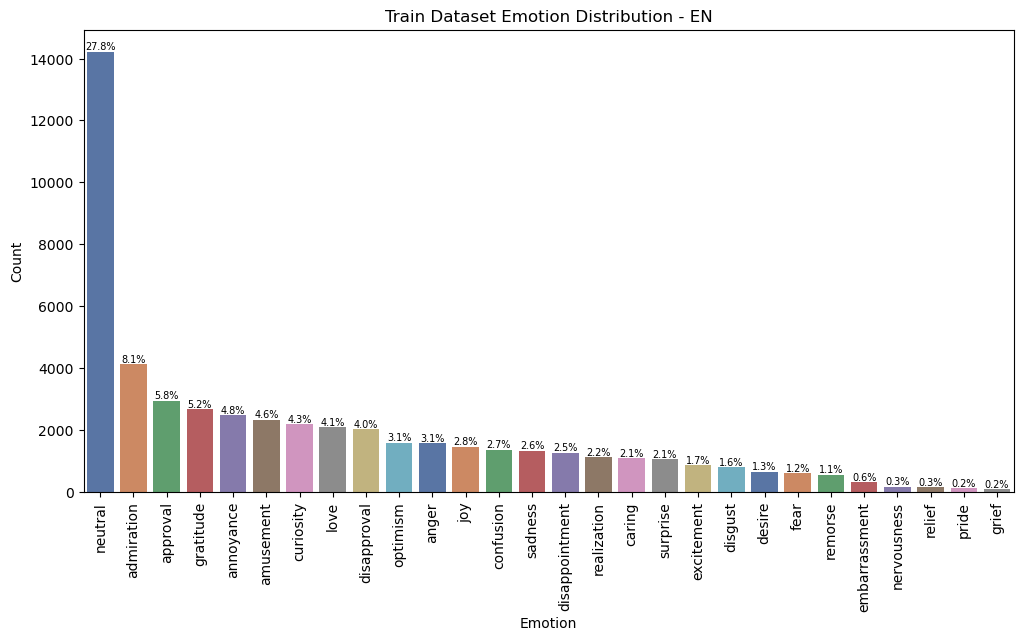

In [174]:
plt.figure(figsize=(12, 6))

ax = sns.barplot(x='Emotion', y='Count', data=train_emotion_stats_df, palette='deep')
total = train_emotion_stats_df['Count'].sum()
for p in ax.patches:
    # Calculate the percentage
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    # Get the coordinate for the label
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    # Place the label on the bar
    ax.text(x, y, percentage, ha='center', va='bottom', fontsize=7)
    
plt.title('Train Dataset Emotion Distribution - EN')
plt.xticks(rotation=90)

plt.show()

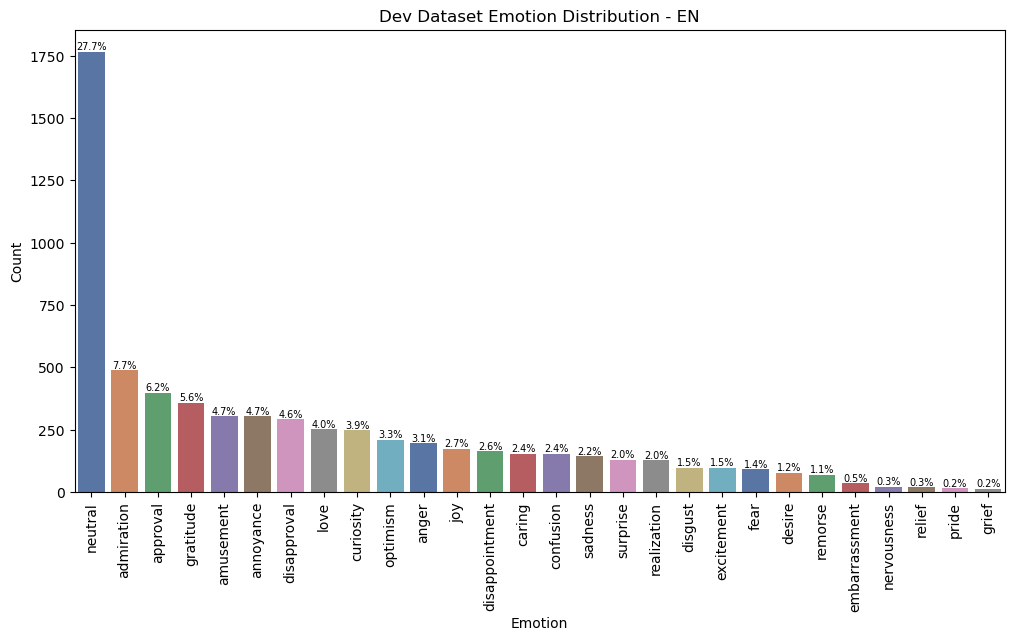

In [175]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Emotion', y='Count', data=dev_emotion_stats_df, palette='deep')

total = dev_emotion_stats_df['Count'].sum()
for p in ax.patches:
    # Calculate the percentage
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    # Get the coordinate for the label
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    # Place the label on the bar
    ax.text(x, y, percentage, ha='center', va='bottom', fontsize=7)
    
plt.title('Dev Dataset Emotion Distribution - EN')
plt.xticks(rotation=90)

plt.show()

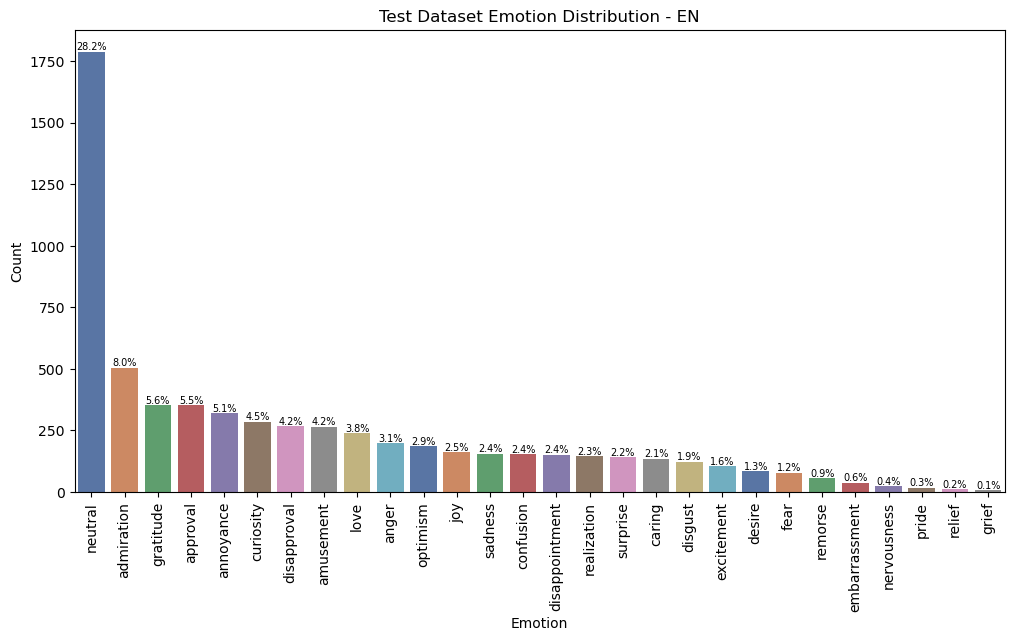

In [176]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Emotion', y='Count', data=test_emotion_stats_df, palette='deep')

total = test_emotion_stats_df['Count'].sum()
for p in ax.patches:
    # Calculate the percentage
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    # Get the coordinate for the label
    x = p.get_x() + p.get_width() / 2
    y = p.get_y() + p.get_height()
    # Place the label on the bar
    ax.text(x, y, percentage, ha='center', va='bottom', fontsize=7)
    
plt.title('Test Dataset Emotion Distribution - EN')
plt.xticks(rotation=90)

plt.show()

/var/folders/nc/35jp7xd579540ylpwlppwwfh0000gn/T/ipykernel_9849/2827924367.py:2: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  one_hot_df = one_hot_df.replace(emotions_dict).str.get_dummies().sum(level=0)


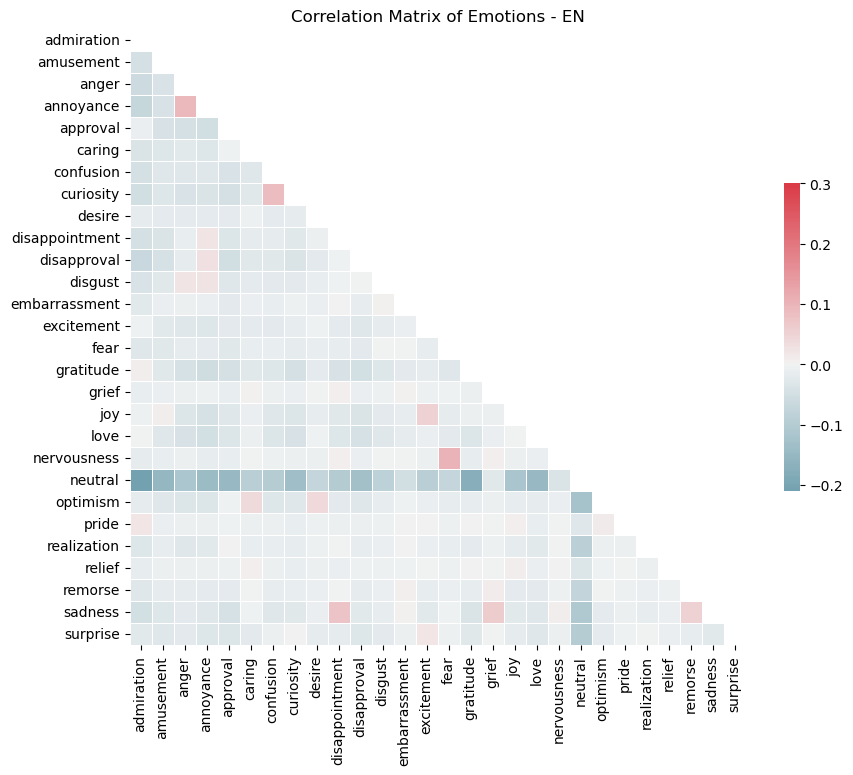

In [177]:
one_hot_df = train['emotion_id'].str.split(',').explode()
one_hot_df = one_hot_df.replace(emotions_dict).str.get_dummies().sum(level=0)

correlation_matrix = one_hot_df.corr()

mask = np.zeros_like(correlation_matrix, dtype=bool)
mask[np.triu_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)
  
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap=cmap, vmax=.3, mask=mask,
      center=0,
      square=True,
      linewidths=.5,cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Emotions - EN')
plt.show()

In [ ]:
train_emotion_stats_dict

In [151]:
train_sentiment_stats_dict = collections.defaultdict(int)
dev_sentiment_stats_dict = collections.defaultdict(int)
test_sentiment_stats_dict = collections.defaultdict(int)

for key in sentiment_mapping.keys():
    for item in sentiment_mapping[key]:
        train_sentiment_stats_dict[key] += train_emotion_stats_dict[item]
        dev_sentiment_stats_dict[key] += dev_emotion_stats_dict[item]
        test_sentiment_stats_dict[key] += test_emotion_stats_dict[item]
    
    

In [152]:
train_ekman_stats_dict = collections.defaultdict(int)
dev_ekman_stats_dict = collections.defaultdict(int)
test_ekman_stats_dict = collections.defaultdict(int)

for key in ekman_mapping.keys():
    for item in ekman_mapping[key]:
        train_ekman_stats_dict[key] += train_emotion_stats_dict[item]
        dev_ekman_stats_dict[key] += dev_emotion_stats_dict[item]
        test_ekman_stats_dict[key] += test_emotion_stats_dict[item]
    

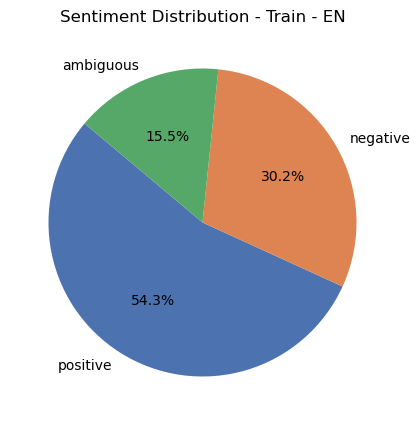

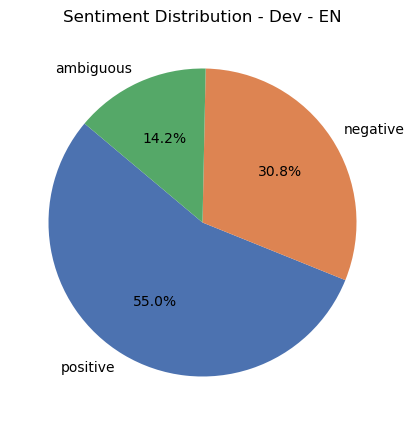

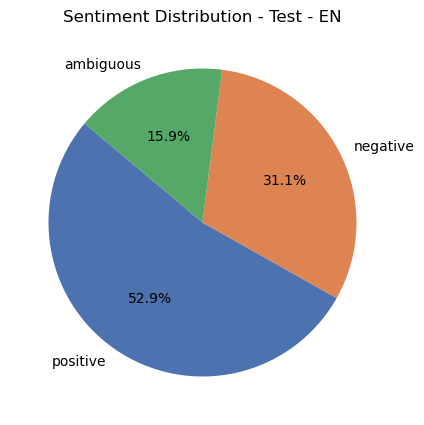

In [178]:
plt.figure(figsize=(5, 5))
plt.pie(train_sentiment_stats_dict.values(), labels=train_sentiment_stats_dict.keys(), autopct='%1.1f%%', startangle=140, colors = sns.color_palette('deep'))
plt.title('Sentiment Distribution - Train - EN')
plt.show()
plt.figure(figsize=(5, 5))
plt.pie(dev_sentiment_stats_dict.values(), labels=dev_sentiment_stats_dict.keys(), autopct='%1.1f%%', startangle=140, colors = sns.color_palette('deep'))
plt.title('Sentiment Distribution - Dev - EN')
plt.show()
plt.figure(figsize=(5, 5))
plt.pie(test_sentiment_stats_dict.values(), labels=test_sentiment_stats_dict.keys(), autopct='%1.1f%%', startangle=140, colors = sns.color_palette('deep'))
plt.title('Sentiment Distribution - Test - EN')
plt.show()

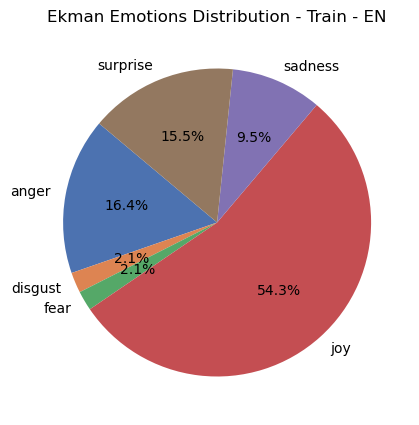

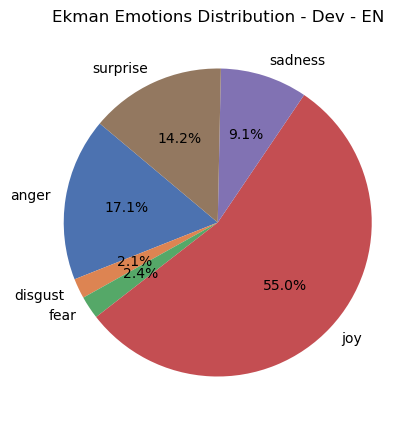

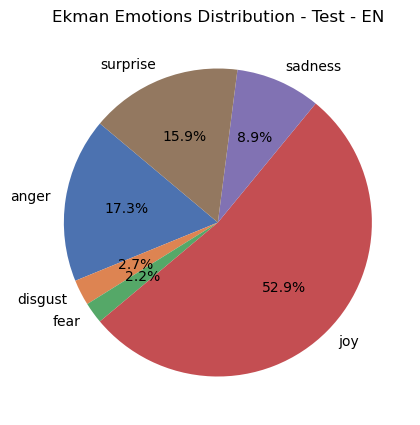

In [179]:
plt.figure(figsize=(5, 5))
plt.pie(train_ekman_stats_dict.values(), labels=train_ekman_stats_dict.keys(), autopct='%1.1f%%', startangle=140, colors = sns.color_palette('deep'))
plt.title('Ekman Emotions Distribution - Train - EN')
plt.show()
plt.figure(figsize=(5, 5))
plt.pie(dev_ekman_stats_dict.values(), labels=dev_ekman_stats_dict.keys(), autopct='%1.1f%%', startangle=140, colors = sns.color_palette('deep'))
plt.title('Ekman Emotions Distribution - Dev - EN')
plt.show()
plt.figure(figsize=(5, 5))
plt.pie(test_ekman_stats_dict.values(), labels=test_ekman_stats_dict.keys(), autopct='%1.1f%%', startangle=140, colors = sns.color_palette('deep'))
plt.title('Ekman Emotions Distribution - Test - EN')
plt.show()